# Riss 인기 학술자료 텍스트 마이닝

## 1. 사용할 패키지 설치

https://www.oracle.com/java/technologies/downloads/#jdk19-mac   
Java JDK 다운로드.   
konlpy를 사용하기 위해 필요.

에러 발생시 (M1)  
https://www.azul.com  
https://velog.io/@wijoonwu/맥북Mac-OS-M1-JDK-설치하기

In [25]:
!pip3 install selenium

In [26]:
!pip3 install jpype1

In [27]:
!pip3 install konlpy

In [35]:
!pip3 install chromedriver_autoinstaller

  Obtaining dependency information for chromedriver_autoinstaller from https://files.pythonhosted.org/packages/b7/17/824a202a4fdb6edda587f25878552beb0da6de70197d5f0b77b8d3781e91/chromedriver_autoinstaller-0.6.2-py3-none-any.whl.metadata


## 2. 사용할 패키지 호출

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [2]:
import os
import chromedriver_autoinstaller as AutoChrome
import shutil

def chromedriver_update():
    chrome_ver      = AutoChrome.get_chrome_version().split('.')[0]

    current_list    = os.listdir(os.getcwd()) 			# 현재 경로의 모든 객체들
    chrome_list = []
    for i in current_list:
        path = os.path.join(os.getcwd(), i) 			# 현재 경로의 모든객체의 전체경로
        if os.path.isdir(path): 				# 그 경로가 폴더인지 확인
            if 'chromedriver.exe' in os.listdir(path): 		# 폴더면 안에 chromedriver.exe가 있는지 확인
                chrome_list.append(i) 				# 있는경우 chrome_list에 추가

    old_version = list(set(chrome_list)-set([chrome_ver])) 	# 그중에 최신버전은 제외

    for i in old_version:
        path = os.path.join(os.getcwd(),i) 			# 구버전이 있는 폴더의 경로 
        shutil.rmtree(path) 					# 그 경로 삭제

    if not chrome_ver in current_list: 				# 최신버전 폴더가 현재 경로에 없으면
        AutoChrome.install(True) 				# 크롬드라이버 설치
    else : pass 				

## 3. 프로그래밍

In [3]:
# webdriver 실행 후 riss 이동
browser = webdriver.Chrome()

SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 114
Current browser version is 116.0.5845.140 with binary path /Applications/Google Chrome.app/Contents/MacOS/Google Chrome
Stacktrace:
0   chromedriver                        0x000000010302ff48 chromedriver + 4226888
1   chromedriver                        0x00000001030284f4 chromedriver + 4195572
2   chromedriver                        0x0000000102c6cd68 chromedriver + 281960
3   chromedriver                        0x0000000102c98bac chromedriver + 461740
4   chromedriver                        0x0000000102c94fd8 chromedriver + 446424
5   chromedriver                        0x0000000102c92150 chromedriver + 434512
6   chromedriver                        0x0000000102ccf93c chromedriver + 686396
7   chromedriver                        0x0000000102ccf164 chromedriver + 684388
8   chromedriver                        0x0000000102c9bf1c chromedriver + 474908
9   chromedriver                        0x0000000102c9cef4 chromedriver + 478964
10  chromedriver                        0x0000000102ff159c chromedriver + 3970460
11  chromedriver                        0x0000000102ff56f0 chromedriver + 3987184
12  chromedriver                        0x0000000102ffb5b4 chromedriver + 4011444
13  chromedriver                        0x0000000102ff62fc chromedriver + 3990268
14  chromedriver                        0x0000000102fce1c0 chromedriver + 3826112
15  chromedriver                        0x0000000103012088 chromedriver + 4104328
16  chromedriver                        0x00000001030121e0 chromedriver + 4104672
17  chromedriver                        0x0000000103021f28 chromedriver + 4169512
18  libsystem_pthread.dylib             0x000000019a2c7fa8 _pthread_start + 148
19  libsystem_pthread.dylib             0x000000019a2c2da0 thread_start + 8


In [ ]:

browser.get("http://www.riss.kr/PopularList.do") 

In [ ]:
# 현제 제공되고 있는 인기 학술자료 목록이 사용된 기간을 저장한다.
span1 = browser.find_element(By.CLASS_NAME, 'periodSpan1').text
span2 = browser.find_element(By.CLASS_NAME, 'periodSpan2').text
data_date = (span1 + "~" +span2)
data_date

'2023.7.30~2023.8.26'

In [ ]:
# 페이지의 자료 확장
browser.find_element(By.ID, 'nextList').click()

In [ ]:
thesis_data = browser.find_elements(By.TAG_NAME, 'tr')

csv = open(f"csv/{data_date}.csv", "a")
csv.write("논문 제목, 링크\n")
csv.close()

for thesis_data_sort in thesis_data:
    thesis_titles = thesis_data_sort.find_elements(By.CLASS_NAME, 'title')
    
    for thesis_title_data in thesis_titles:
        title = thesis_title_data.text
        link = thesis_title_data.get_attribute("href")
        
        csv = open(f"csv/{data_date}.csv", "a")
        csv.write(f"{title}, {link}\n")
        csv.close()
        
        file = open(f"txt/{data_date}.txt", "a")
        file.write(f"{title}\n")
        file.close()

In [ ]:
# 저장한 텍스트 파일 읽어오기
file_data = open(f"txt/{data_date}.txt", encoding= "UTF-8").read()
file_data

"미래 사회에서 메타버스 교육의 방향\n사형제도는 폐지되어야 하는가?\n스트레스 수준이 대학생들의 학업 성취도에 미치는 영향\n챗GPT에 빼앗긴 밥그릇\nMZ 세대의 개인주의 문화, 어떻게 볼 것인가?\n촉법소년 상한(형사미성년자) 연령 하향에 대한 비판적 고찰\nChatGPT시대 인공지능교육정책의 문제점 고찰\n국내외 가짜뉴스(Fake News)에 대한 뉴스 공정성 연구논의 탐색\n노키즈존 확산, 어떻게 볼 것인가?\n일본의 후쿠시마 오염수 해양 방출 계획 저지를 위한 한국의 대응 전략: 방사성물질로부터 영해 수호를 위한 정책적 제언\n바이오 기술을 통한 의약품 산업의 혁신\n자연 상태에서 일어나는 음펨바 효과에 대한 연구\n[토론문 1] 저출산·고령화와 인구정책\n그리스-로마 신화의 교훈\n고교학점제의 쟁점과 과제 분석\n미혼 성인남녀의 저출산 정책 인식에 관한 연구\n사상체질과 MBTI성격유형검사를 통한 대학생 건강염려증의 상관관계연구\n영화 속에서 나타난 인공지능의 인간화와 인간지배 현상 연구 - 신체가 있는 인공지능과 하이퍼 인공지능을 중심으로\nThe Impact of Employees' Growth Mindset on Organizational Citizenship Behavior in Small and Medium-sized Enterprises (SMEs): Focusing on the Mediating Effect of Authentic Leadership\n다이어트, 당신은 건강합니까?\n최근 5년간 한국 의학드라마에 나타난 간호사 이미지와 역할 수행에 대한 연구\n최저임금제도 개선방안에 관한 연구\n한국 인공지능 교육의 방향\n인공지능교육에 대한 초등교사의 인식 조사\n챗봇 기반 인공지능 교육 프로그램 개발과 적용\n펜타닐에 대한 중독경험자와 전문가의 인식 차이\n음악치료 소개와 음악이란 매개체가 갖는 특별한 우수성\n바이럴마케팅의 방향에 관한 연구와 진행 사례\n챗GPT 충격파… 성큼 다가온 인공지능\n인공지능을 활용한 예술융합교육이 초

In [ ]:
# 불필요한 문자 제거
# '[^가-힣]' : 한글이 아닌 모든 문자
import re
file_data = re.sub('[^가-힣]', ' ', file_data)
file_data

'미래 사회에서 메타버스 교육의 방향 사형제도는 폐지되어야 하는가  스트레스 수준이 대학생들의 학업 성취도에 미치는 영향 챗   에 빼앗긴 밥그릇    세대의 개인주의 문화  어떻게 볼 것인가  촉법소년 상한 형사미성년자  연령 하향에 대한 비판적 고찰        시대 인공지능교육정책의 문제점 고찰 국내외 가짜뉴스           에 대한 뉴스 공정성 연구논의 탐색 노키즈존 확산  어떻게 볼 것인가  일본의 후쿠시마 오염수 해양 방출 계획 저지를 위한 한국의 대응 전략  방사성물질로부터 영해 수호를 위한 정책적 제언 바이오 기술을 통한 의약품 산업의 혁신 자연 상태에서 일어나는 음펨바 효과에 대한 연구  토론문    저출산 고령화와 인구정책 그리스 로마 신화의 교훈 고교학점제의 쟁점과 과제 분석 미혼 성인남녀의 저출산 정책 인식에 관한 연구 사상체질과     성격유형검사를 통한 대학생 건강염려증의 상관관계연구 영화 속에서 나타난 인공지능의 인간화와 인간지배 현상 연구   신체가 있는 인공지능과 하이퍼 인공지능을 중심으로                                                                                                                                                                                       다이어트  당신은 건강합니까  최근  년간 한국 의학드라마에 나타난 간호사 이미지와 역할 수행에 대한 연구 최저임금제도 개선방안에 관한 연구 한국 인공지능 교육의 방향 인공지능교육에 대한 초등교사의 인식 조사 챗봇 기반 인공지능 교육 프로그램 개발과 적용 펜타닐에 대한 중독경험자와 전문가의 인식 차이 음악치료 소개와 음악이란 매개체가 갖는 특별한 우수성 바이럴마케팅의 방향에 관한 연구와 진행 사례 챗    충격파  성큼 다가온 인공지능 인공지능을 활용한 예술융합교육이 초등학생 창의성에 미치는 효과 배양육이 축산을 대체할 

#### m1 맥에서 jvm을 제대로 찾지 못하는 이슈가 있었음.
#### 맨 위의 링크를 통해 설치하고 경로를 직접 설정
#### https://github.com/konlpy/konlpy/issues/353 해당 페이지 참조

In [ ]:
# 명사 추출
import konlpy
JVM_PATH = '/Library/Java/JavaVirtualMachines/zulu-11.jdk/Contents/Home/bin/java'


hannanum = konlpy.tag.Hannanum(jvmpath=JVM_PATH)
nouns_data = hannanum.nouns(file_data)
print(nouns_data)


['미래', '사회', '메타버스', '교육', '방향', '사형제도', '폐', '스트레스', '수준', '대학생들', '학업', '성취도', '영향', '챗', '밥그릇', '세대', '개인주의', '문화', '것', '촉법소년', '형사미성년자', '연령', '하향', '비판적', '고찰', '시대', '인공지능교육정책', '문제점', '고찰', '국내외', '가짜뉴스', '뉴스', '공정성', '연구논', '탐색', '노키즈존', '확산', '것', '일본', '후쿠시마', '오염수', '해양', '방출', '계획', '한국의', '대응', '전략', '방사성물질', '수호', '정책적', '제언', '바', '기술', '의약품', '산업', '혁신', '자연', '상태', '음펨바', '효과', '연구', '토론문', '저출산', '고령화', '인구정책', '그리스', '로마', '신화', '교훈', '고교학점제', '쟁점', '과제', '분석', '미혼', '성인남녀', '저출산', '정책', '식', '연구', '사상체질', '성격유형검사', '대학생', '건강염려증', '상관관계연구', '영화', '속', '인공지능', '인간화', '인간지배', '현상', '연구', '신체', '인공지능', '하이퍼', '인공지능', '중심', '다이어트', '당신', '건강', '년', '한국', '의학드라마', '간호사', '이미지', '수행', '연구', '최저임금제', '개선방안', '연구', '한국', '인공지능', '교육', '방향', '인공지능교육', '초등교사', '인식', '조사', '챗봇', '기반', '인공지능', '교육', '프로그램', '개발', '적용', '펜타닐', '중독경험자', '전문가', '인식', '차', '음악치료', '소개', '음악', '매개체', '특별', '우수성', '바이럴마케팅', '방향', '연구', '진행', '사례', '챗', '충격파', '인공지능', '인공지능', '활용', '예술융합교육', '초등학생', 

In [ ]:
import pandas as pd
df_word = pd.DataFrame({'word' : nouns_data})
df_word

,word
0,미래
1,사회
2,메타버스
3,교육
4,방향
...,...
559,학교현장실습
560,의미
561,머리
562,인공지능


In [ ]:
df_word['count'] = df_word['word'].str.len()
df_word

,word,count
0,미래,2
1,사회,2
2,메타버스,4
3,교육,2
4,방향,2
...,...,...
559,학교현장실습,6
560,의미,2
561,머리,2
562,인공지능,4


In [ ]:
df_word = df_word.groupby('word', as_index=False)\
    .agg(n = ('word', 'count'))\
        .sort_values('n', ascending=False)
df_word

,word,n
257,인공지능,19
203,연구,18
207,영향,11
133,분석,9
39,교육,7
...,...,...
141,사상체질,1
140,사례,1
139,삐아제,1
137,비교분석,1


In [ ]:
# 단어 빈도 막대 그래프
top20 = df_word.head(20)

In [ ]:
!pip3 install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


<Axes: xlabel='n', ylabel='word'>

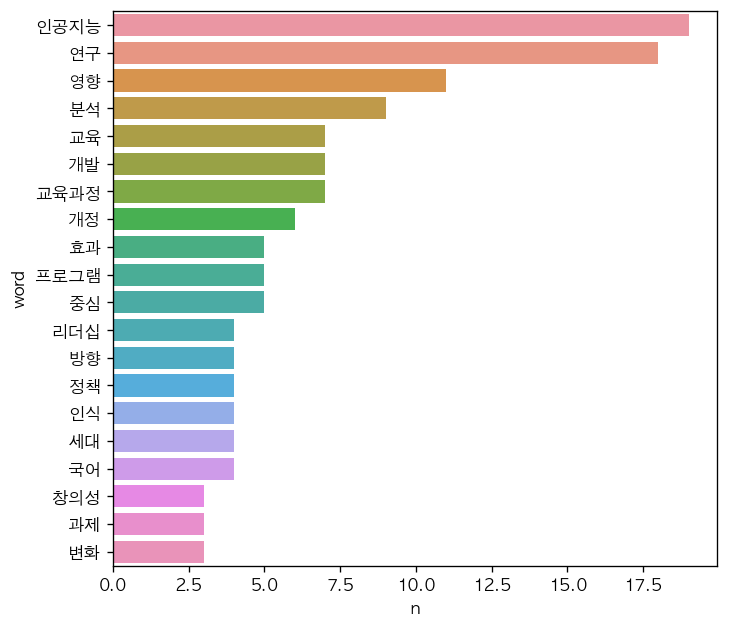

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트의 경우 
# https://github.com/GUuu9/Nas_Docker_jupyter_Ko_fonts
# 해당 페이지을 참고하여 폰트 설정

plt.rcParams.update({'font.family' : 'AppleGothic',
                    'figure.dpi' : '120',
                    'figure.figsize' : [6.5, 6]})

bar_data = sns.barplot(data = top20, y = 'word', x= 'n')
plt.savefig(f'barplot/{data_date}.png', dpi=300)
bar_data

In [ ]:
# 워드 클라우드 생성
!pip3 install wordcloud


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'인공지능': 19,
 '연구': 18,
 '영향': 11,
 '분석': 9,
 '교육': 7,
 '개발': 7,
 '교육과정': 7,
 '개정': 6,
 '효과': 5,
 '프로그램': 5,
 '중심': 5,
 '리더십': 4,
 '방향': 4,
 '정책': 4,
 '인식': 4,
 '세대': 4,
 '국어': 4,
 '창의성': 3,
 '과제': 3,
 '변화': 3,
 '예술': 3,
 '영역': 3,
 '비교': 3,
 '역량': 3,
 '고찰': 3,
 '음악': 3,
 '청소년': 3,
 '이용': 3,
 '대응': 3,
 '건강': 3,
 '초': 2,
 '매개효과': 2,
 '미래': 2,
 '챗': 2,
 '제언': 2,
 '방안': 2,
 '마약': 2,
 '전망': 2,
 '초등학생': 2,
 '흡연': 2,
 '사용': 2,
 '적용': 2,
 '저출산': 2,
 '오가노이드': 2,
 '윤리적': 2,
 '식': 2,
 '시사점': 2,
 '시대': 2,
 '스트레스': 2,
 '수학적': 2,
 '수': 2,
 '이론': 2,
 '산업': 2,
 '사회적': 2,
 '사회': 2,
 '촉법소년': 2,
 '비판적': 2,
 '쟁점': 2,
 '초전도체': 2,
 '문해력': 2,
 '관계': 2,
 '활동': 2,
 '국내': 2,
 '경험': 2,
 '현황': 2,
 '기술': 2,
 '하향': 2,
 '고교학점제': 2,
 '한국': 2,
 '년': 2,
 '기반': 2,
 '활성화': 2,
 '관련': 2,
 '활용': 2,
 '것': 2,
 '임파워먼트': 1,
 '자기초점': 1,
 '의학드라마': 1,
 '이계': 1,
 '행동의도': 1,
 '이론적': 1,
 '해양': 1,
 '이미': 1,
 '학습': 1,
 '이미지': 1,
 '자기표현': 1,
 '이해': 1,
 '인간지배': 1,
 '인간화': 1,
 '해결방안': 1,
 '자기제시': 1,
 '인공지능교육': 1,
 '자기결정권': 1,
 '인공지능윤리': 1

In [ ]:
from wordcloud import WordCloud
we = WordCloud(random_state = 1234,
              font_path = 'AppleGothic',
              width = 400,
              height = 400,
              background_color = 'white')

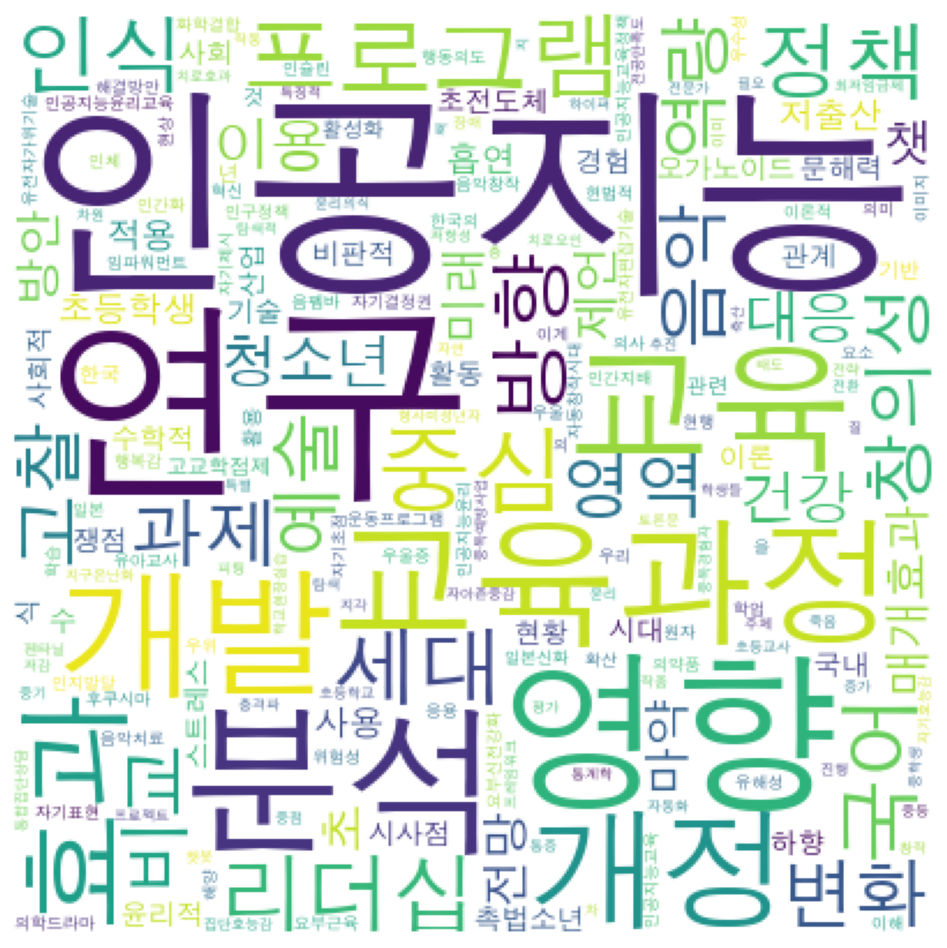

In [ ]:
img_wordcloud = we.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10))
plt.axis('off')
img_wordcloud = plt.imshow(img_wordcloud)
plt.savefig(f'wordcloud/{data_date}.png', dpi=300)
img_wordcloud

➜Riss_Popular_thesis_wordCloud git:(main) ✗ git init  

➜  Riss_Popular_thesis_wordCloud git:(main) ✗ git add .  

➜  Riss_Popular_thesis_wordCloud git:(main) ✗ git commit -m "init commit"  

➜  Riss_Popular_thesis_wordCloud git:(main) git branch -M main  

➜  Riss_Popular_thesis_wordCloud git:(main) git push origin main  


에러 발생시
git push -f origin 명령으로 강제 업로드